<a href="https://colab.research.google.com/github/BenJoshMudi/GOMYCODE.BEN/blob/main/Africa_Climate_Change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necccessary libaries
import pandas as pd
import plotly.express as px

In [ ]:
# load the dataset
df = pd.read_csv("Africa_climate_change.csv")
df.head()


DATE  PRCP  TAVG  TMAX  TMIN   COUNTRY
0  19800101 000000   NaN  54.0  61.0  43.0   Tunisia
1  19800101 000000   NaN  49.0  55.0  41.0   Tunisia
2  19800101 000000   0.0  72.0  86.0  59.0  Cameroon
3  19800101 000000   NaN  50.0  55.0  43.0   Tunisia
4  19800101 000000   NaN  75.0  91.0   NaN  Cameroon

In [ ]:
# Check for information in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347050 entries, 0 to 347049
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     347050 non-null  object 
 1   PRCP     148041 non-null  float64
 2   TAVG     340674 non-null  float64
 3   TMAX     291725 non-null  float64
 4   TMIN     263117 non-null  float64
 5   COUNTRY  347049 non-null  object 
dtypes: float64(4), object(2)
memory usage: 15.9+ MB


In [ ]:
# Check for the number of NAN in each column
df.isnull().sum()

DATE            0
PRCP       199009
TAVG         6376
TMAX        55325
TMIN        83933
COUNTRY         1
dtype: int64

In [ ]:
new_data= df.copy()
new_data.head()
new_data.rename(columns={'PRCP': 'Precipitation', 'TAVG':'AvgTemperature',
                         'TMAX': 'MaximumTemp', 'TMIN': 'MinimumTemp.'},inplace=True)
new_data.head()

DATE  Precipitation  AvgTemperature  MaximumTemp  MinimumTemp.  \
0  19800101 000000            NaN            54.0         61.0          43.0   
1  19800101 000000            NaN            49.0         55.0          41.0   
2  19800101 000000            0.0            72.0         86.0          59.0   
3  19800101 000000            NaN            50.0         55.0          43.0   
4  19800101 000000            NaN            75.0         91.0           NaN   

    COUNTRY  
0   Tunisia  
1   Tunisia  
2  Cameroon  
3   Tunisia  
4  Cameroon

In [ ]:
year_only = new_data['DATE'].str[:4]
new_data['Year'] = year_only
new_data

DATE  Precipitation  AvgTemperature  MaximumTemp  \
0       19800101 000000            NaN            54.0         61.0   
1       19800101 000000            NaN            49.0         55.0   
2       19800101 000000            0.0            72.0         86.0   
3       19800101 000000            NaN            50.0         55.0   
4       19800101 000000            NaN            75.0         91.0   
...                 ...            ...             ...          ...   
347045  20130510 000000            NaN            73.0         87.0   
347046  20130510 000000            0.0            78.0         95.0   
347047  20130510 000000            NaN            84.0         98.0   
347048  20130510 000000            NaN            82.0        105.0   
347049  20130510 000000            NaN            79.0          NaN   

        MinimumTemp.   COUNTRY  Year  
0               43.0   Tunisia  1980  
1               41.0   Tunisia  1980  
2               59.0  Cameroon  1980  
3               43.0   Tunisia  1980  
4                NaN  Cameroon  1980  
...              ...       ...   ...  
347045          61.0     Egypt  2013  
347046          65.0   Tunisia  2013  
347047          73.0     Egypt  2013  
347048           NaN   Senegal  2013  
347049           NaN       NaN  2013  

[347050 rows x 7 columns]

In [ ]:
new_data.drop('DATE', axis= 1, inplace= True)
new_data.head()

Precipitation  AvgTemperature  MaximumTemp  MinimumTemp.   COUNTRY  Year
0            NaN            54.0         61.0          43.0   Tunisia  1980
1            NaN            49.0         55.0          41.0   Tunisia  1980
2            0.0            72.0         86.0          59.0  Cameroon  1980
3            NaN            50.0         55.0          43.0   Tunisia  1980
4            NaN            75.0         91.0           NaN  Cameroon  1980

In [ ]:
# changing the dtype of Year from string to int
new_data['Year'] = new_data['Year'].astype(int)
new_data['Year'].dtype

dtype('int64')

In [ ]:
# Set the limit
# Drop columns using that limit
limit = len(new_data) * 0.7
new=new_data.dropna(axis=1, thresh=limit)
# View columns in the dataset
new.head()

AvgTemperature  MaximumTemp  MinimumTemp.   COUNTRY  Year
0            54.0         61.0          43.0   Tunisia  1980
1            49.0         55.0          41.0   Tunisia  1980
2            72.0         86.0          59.0  Cameroon  1980
3            50.0         55.0          43.0   Tunisia  1980
4            75.0         91.0           NaN  Cameroon  1980

In [ ]:
new.columns

Index(['AvgTemperature', 'MaximumTemp', 'MinimumTemp.', 'COUNTRY', 'Year'], dtype='object')

In [ ]:
# filling null values using the mean values
new.loc[:, 'MinimumTemp.'] = new['MinimumTemp.'].fillna(new['MinimumTemp.'].mean())
new.loc[:, 'AvgTemperature'] = new['AvgTemperature'].fillna(new['AvgTemperature'].mean())
new.loc[:, 'MaximumTemp'] = new['MaximumTemp'].fillna(new['MaximumTemp'].mean())


In [ ]:
# Verify if there is any missing values
new.isnull().sum()

AvgTemperature    0
MaximumTemp       0
MinimumTemp.      0
COUNTRY           1
Year              0
dtype: int64

In [ ]:
import plotly.express as px

# Selecting dataframe to answer the temperature fluctuations in Tunisia and Cameroon
countries = ['Tunisia', 'Cameroon']
df = new_data[new_data['COUNTRY'].isin(countries)]

# Line chart to show fluctuations
fig = px.line(df, x='Year', y="AvgTemperature", color="COUNTRY", markers=True,
              title="Average Temperature Fluctuations in Tunisia and Cameroon")
fig.show()

In [ ]:
# Interpreting the results:

# By visualizing the entire dataset, you can observe the overall trends and patterns in temperature fluctuations in Tunisia and Cameroon across all available years.
# If the lines for both countries follow similar patterns, it indicates that they experience similar temperature fluctuations over time.
# Differences in the trends between the lines may suggest variations in climate or weather patterns between Tunisia and Cameroon.
# Any significant spikes or dips in the lines could indicate extreme weather events or shifts in climate conditions.

# Countries: Tunisia (blue line) and Cameroon (red line) are represented.
# Temperature Range: The y-axis shows average temperature, ranging from -50 to 100.
# Time Period: The data spans from 1980 to around 2010.


In [ ]:
# Selecting dataframe to answer the temperature fluctuations in Tunisia and Cameroon
countries = ['Tunisia', 'Cameroon']
df = new_data[new_data['COUNTRY'].isin(countries)]
time = df.loc[(df['Year'] >= 1980) & (df['Year'] <= 2005)]

# Line chart to show fluctuations
fig = px.line(time, x=time['Year'], y="AvgTemperature", color="COUNTRY", markers=True,
              title="Average Temperature Fluctuations in Tunisia and Cameroon")
fig.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
# Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023]
senegal = new.loc[new['COUNTRY'] == 'Senegal']
time1 = new.loc[(new['Year'] >= 1980) & (new['Year'] <= 2000)]
time2 = new.loc[(new['Year'] >= 2000) & (new['Year'] <= 2023)]

# Create histograms
fig = px.histogram(senegal, x="AvgTemperature", title='Average Temperature Distribution in Senegal')
fig.update_layout(barmode='overlay')  # Overlay histograms for better comparison

# Add histograms for each time period
fig.add_trace(go.Histogram(x=time1['AvgTemperature'], nbinsx=20, opacity=0.5, name='1980-2000'))
fig.add_trace(go.Histogram(x=time2['AvgTemperature'], nbinsx=20, opacity=0.5, name='2000-2023'))

# Show the plot
fig.show()

In [ ]:
# Select the best chart to show the Average temperature per country.
avg_temp= new.groupby('COUNTRY')['AvgTemperature'].mean().reset_index()
display(avg_temp.head())
px.pie(data_frame= avg_temp, names= 'COUNTRY',
       values= 'AvgTemperature', hole= 0.3, title= 'Average Temperature by Country')

COUNTRY  AvgTemperature
0    Angola       76.449491
1  Cameroon       79.760974
2     Egypt       73.513667
3   Senegal       82.719890
4   Tunisia       67.335882

How have average temperatures changed over time for each country?

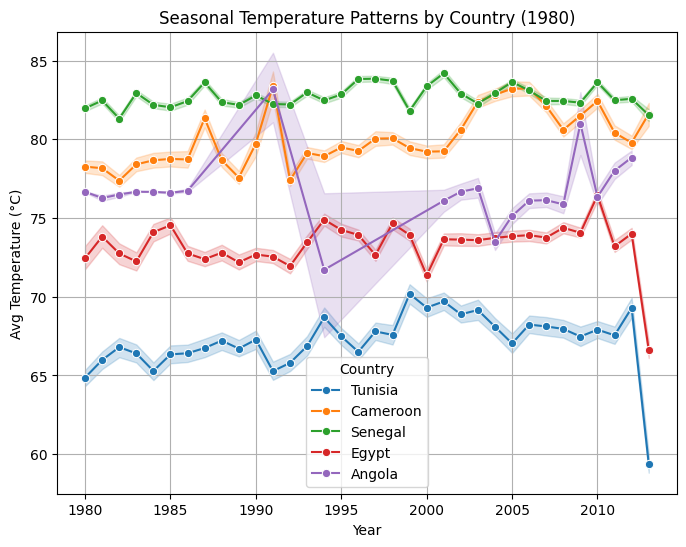

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'new' is your DataFrame
plt.figure(figsize=(8, 6))
sns.lineplot(data=new, x='Year', y='AvgTemperature', hue='COUNTRY', marker='o')
plt.title('Seasonal Temperature Patterns by Country (1980)')
plt.xlabel('Year')
plt.ylabel('Avg Temperature (°C)')
plt.legend(title='Country')
plt.grid(True)
plt.show()

In [ ]:
"""
Seasonal Fluctuations:
All countries exhibit seasonal variations with peaks and troughs.
These fluctuations represent changes in temperature throughout the year.

Temperature Trends:
Each colored line represents a country’s temperature trend over the years.
Senegal (green) and Cameroon (orange) generally have higher temperatures.
Angola (purple) has the lowest temperatures.

"""

'\nSeasonal Fluctuations:\nAll countries exhibit seasonal variations with peaks and troughs.\nThese fluctuations represent changes in temperature throughout the year.\n\nTemperature Trends:\nEach colored line represents a country’s temperature trend over the years.\nTunisia (green) and Cameroon (orange) generally have higher temperatures.\nAngola (blue) has the lowest temperatures.\nSenegal (purple) and Egypt (red) fall in between\n\n'

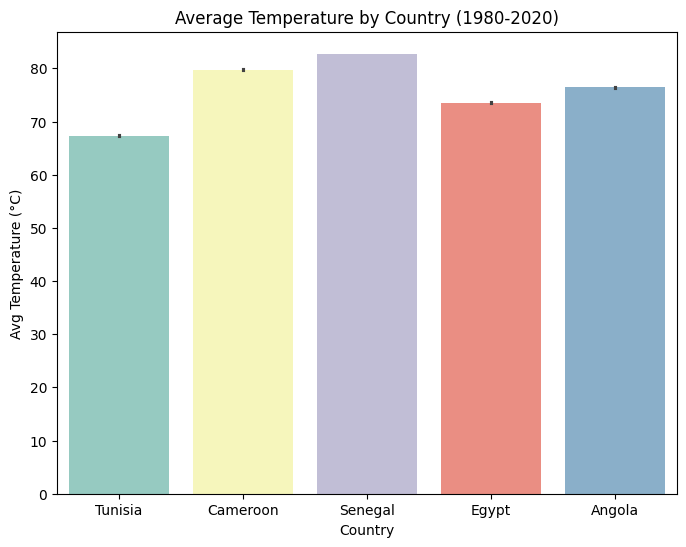

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=new, x='COUNTRY', y='AvgTemperature', hue='COUNTRY', palette='Set3', legend=False)
plt.title('Average Temperature by Country (1980-2020)')
plt.xlabel('Country')
plt.ylabel('Avg Temperature (°C)')
plt.show()

ANSWER

Senegal experienced the highest average temperature among the countries listed in the graph. The red bar representing Egypt reaches close to 80°C, indicating the warmest climate1 **bold text**